# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = "tic-tac-toe.csv"
df = pd.read_csv(r"/content/neural network lab 1/tic-tac-toe.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True


In [4]:
# replaxing x with 1, o with -1 and b with 0
df.replace({'x': 1, 'o': -1, 'b': 0}, inplace=True)

df['class'] = df['class'].astype(int) # converting class into int

<ipython-input-4-65efece1a619>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'x': 1, 'o': -1, 'b': 0}, inplace=True)


In [5]:
print(df.head()) # now it is more clear and everything has been converted into integers.

   TL  TM  TR  ML  MM  MR  BL  BM  BR  class
0   1   1   1   1  -1  -1   1  -1  -1      1
1   1   1   1   1  -1  -1  -1   1  -1      1
2   1   1   1   1  -1  -1  -1  -1   1      1
3   1   1   1   1  -1  -1  -1   0   0      1
4   1   1   1   1  -1  -1   0  -1   0      1


In [9]:
# splitting the data

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify, a new thing i havent seen before,  keeps the same proportion of class labels in training & test sets.

print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (958, 9)
Shape of y (target): (958,)


In [8]:
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(9,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Binary classification loss function
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314 (1.23 KB)

 Trainable params: 314 (1.23 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# fitting the training data:

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))



Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5970 - loss: 0.6638 - val_accuracy: 0.6458 - val_loss: 0.5839
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.5776 - val_accuracy: 0.6771 - val_loss: 0.5506
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7378 - loss: 0.5073 - val_accuracy: 0.7240 - val_loss: 0.5163
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4652 - val_accuracy: 0.7656 - val_loss: 0.4771
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss: 0.4461 - val_accuracy: 0.7969 - val_loss: 0.4426
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8192 - loss: 0.3978 - val_accuracy: 0.8438 - val_loss: 0.3885
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8612 - loss: 0.3517 - val_accuracy: 0.9115 - val_loss: 0.3319
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8993 - loss: 0.2988 - val_accuracy: 0.9323 - val_loss:

In [40]:
# now i want to evaluate the model

test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accurace:", test_acc)
print(f"Test loss:", test_loss)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9965 - loss: 0.0482     
Test accurace: 0.9947916865348816
Test loss: 0.07359649986028671


In [23]:
# saving the model for later use. # have to use model.save and import keras.
from tensorflow import keras
model.save("tic-tac-toe.keras")

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [24]:
# loading the model

from tensorflow import keras

model = keras.models.load_model("tic-tac-toe.keras")


In [41]:
import numpy as np  # Testing the model for 10 rounds.

num_samples = 10

X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

indices = np.random.choice(len(X_test_array), num_samples, replace=False)

X_sample = X_test_array[indices]
y_actual = y_test_array[indices]

predictions = model.predict(X_sample)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(num_samples):
    print(f"Actual: {y_actual[i]}, Predicted: {predicted_classes[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# I will try to improve the model by adding a layer of neurons, then I will try to adjust the number of epochs, also maybe change the learning rate.

In [46]:
# I am adding more layers to the code:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(9,)))  #added 32 neurons to the input layer
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

custom_optimizer = Adam(learning_rate=0.0005) # here I am adding the custom version of the adam optimizer.

model.compile(
    optimizer=custom_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,002 (3.91 KB)

 Trainable params: 1,002 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased from 50 to 100.
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 7.8989e-04 - val_accuracy: 0.9844 - val_loss: 0.0894
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.5690e-04 - val_accuracy: 0.9792 - val_loss: 0.0914
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.6629e-04 - val_accuracy: 0.9844 - val_loss: 0.0905
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.1606e-04 - val_accuracy: 0.9844 - val_loss: 0.0907
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 6.3759e-04 - val_accuracy: 0.9844 - val_loss: 0.0911
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 4.6462e-04 - val_accuracy: 0.9844 - val_loss: 0.0909
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0741e-04 - val_accuracy: 0.9844 - val_loss: 0.0929
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.737

In [ ]:
# What happened is that when i increased the complexity (number of neurons) and the number of epochs, it just stopped improving. It led to overfitting.

Some key takeaways:

in this new run with more neurons and epochs, it led to overfitting. The model is too confident in training but not improving validation performance.

In [ ]:
# I will try to put a stop so that it stops if the loss value does not improve:

In [49]:
# Early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.5549e-06 - val_accuracy: 0.9844 - val_loss: 0.1115
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.9490e-06 - val_accuracy: 0.9844 - val_loss: 0.1110
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.6374e-06 - val_accuracy: 0.9844 - val_loss: 0.1131
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5127e-06 - val_accuracy: 0.9844 - val_loss: 0.1137
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.4461e-06 - val_accuracy: 0.9844 - val_loss: 0.1112
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.3808e-06 - val_accuracy: 0.9844 - val_loss: 0.1158
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5288e-06 - val_accuracy: 0.9844 - val_loss: 0.1133


In [ ]:
# Early stopping showed that much fewer epochs are needed to come to a high accuracy and a low loss value.

#This may suggest that reduced complexity, by removing the neurons and adding dropout to randomly remove neurons.

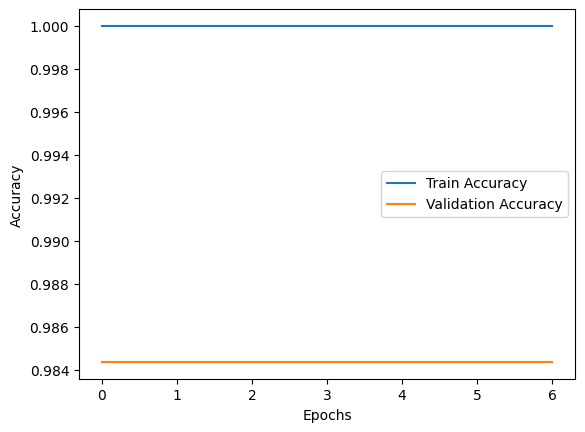

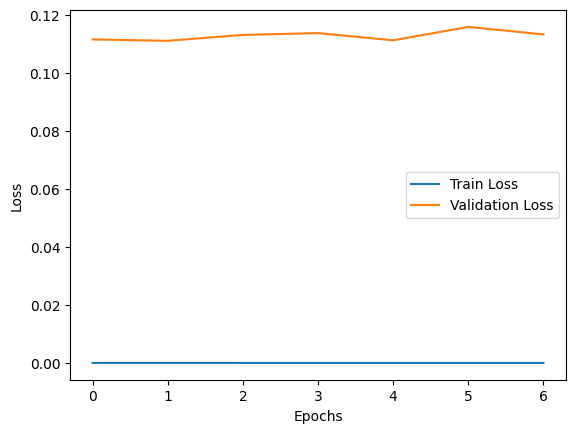

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# I think the best way to improve the model is by using an early stop, when improvement is no more, and to reduce the complexity to match the dataset. I think have too many layers can lead to overfitting. Also optimizing the learning rate can improve performance.